# TEST iv sipm

You are working on the REV file ..\Data\IV-LN2\REV_Vg_19-06-2020_5.csv. Do you want to proceed? (y/n) (n will make you choose the next file. To go back you have to interrupt the run.) y
You are working on the REV file ..\Data\IV-RoomT\REV_Vg_16-06-2020_5.csv. Do you want to proceed? (y/n) (n will make you choose the next file. To go back you have to interrupt the run.) y


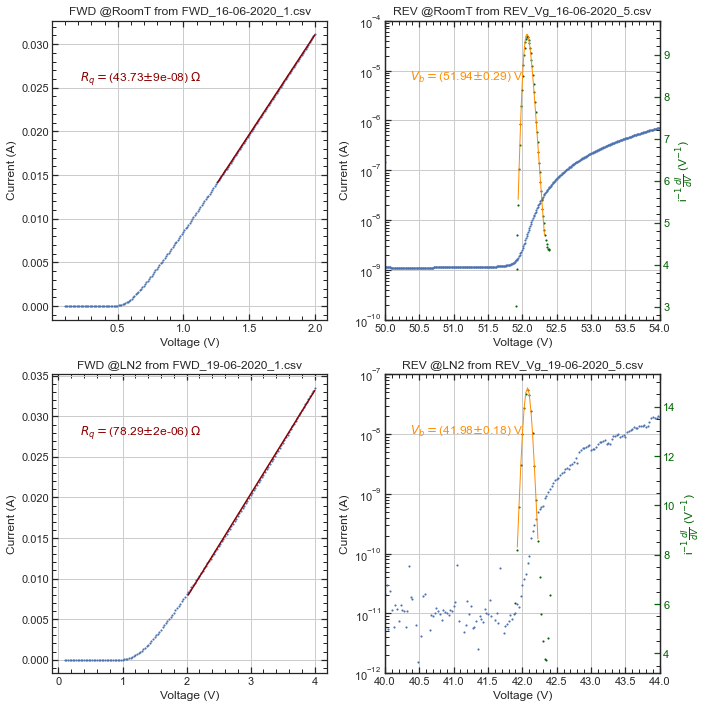

In [1]:
from iv_sipm_class_DEF import *

# %matplotlib

BASEPATH = "..\\Data\\"

myfiles = {'LN2':   {'FWD': [], 'REV': []},
           'RoomT': {'FWD': [], 'REV': []} }

TEMPERATURES = list(myfiles.keys())
DIRECTIONS = ['FWD','REV']

params = {'LN2':   {'threshold': 2, 
                    'rev_limits': (41.9,42.4),
                    'xlim': (40,44),
                    'ylim': (1e-12,1e-7),
                    'plt_idx': 0},
          'RoomT': {'threshold': 1.25,
                    'rev_limits': (51.9,52.4),
                    'xlim': (50,54),
                    'ylim': (1e-10,1e-4),
                    'plt_idx': 1},
          'revFitDegree': 4,
          'ncells': 11188,
         }

###############################################################################

### Prepare DICT with files to be processed
for root, dirs, files in os.walk(BASEPATH):
    
    if "DCR" in dirs:
        dirs.remove('DCR')
    
    if fnmatch.fnmatch(root, "*LN2"):
        myfiles['LN2'] = {D: [os.path.join(root, file) for file in files if file.find(D) > -1] for D in DIRECTIONS}
        myfiles['LN2']['REV'].sort()

    if fnmatch.fnmatch(root, "*RoomT"):
        myfiles['RoomT'] = {D: [os.path.join(root, file) for file in files if file.find(D) > -1] for D in DIRECTIONS }
        myfiles['RoomT']['REV'].sort()

        
###############################################################################

# Plotting

fig, ax = plt.subplots(2,2, figsize=(10,10))

# LN2
datafiles = myfiles[TEMPERATURES[0]]
sipmf = iv(TEMPERATURES[0],datafiles,params=params)

# RoomT
datafiles = myfiles[TEMPERATURES[1]]
sipmc = iv(TEMPERATURES[1],datafiles,params=params)

# Perform fit
sipmf.fit_iv()
sipmc.fit_iv()

# Plot
sipmc.plot_iv('RoomT',ax[0])
sipmf.plot_iv('LN2',ax[1])
fig.tight_layout()
# plt.savefig("FWD-REV_plots.pdf", dpi='figure', format='pdf')

# Original code, commented (below)